<a href="https://colab.research.google.com/github/Sina-Akhavi/Analog-data-Digital-signal-Sampling/blob/main/digit_recognition01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print("TensorFlow Implementation")

TensorFlow Implementation


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from  autils import *
from  utils import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [6]:
X, y = load_data()

In [8]:
print(f"Shape of X is {X.shape}")
print(f"Shape of y is {y.shape}")

Shape of X is (1000, 400)
Shape of y is (1000, 1)


In [9]:
print(f"x[0] is : \n{X[0]}")
print(f"The label is {y[0]}")
print('------------------------------------')
print(f"x[-1] is : \n{X[-1]}")
print(f"The label is {y[-1]}")

x[0] is : 
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

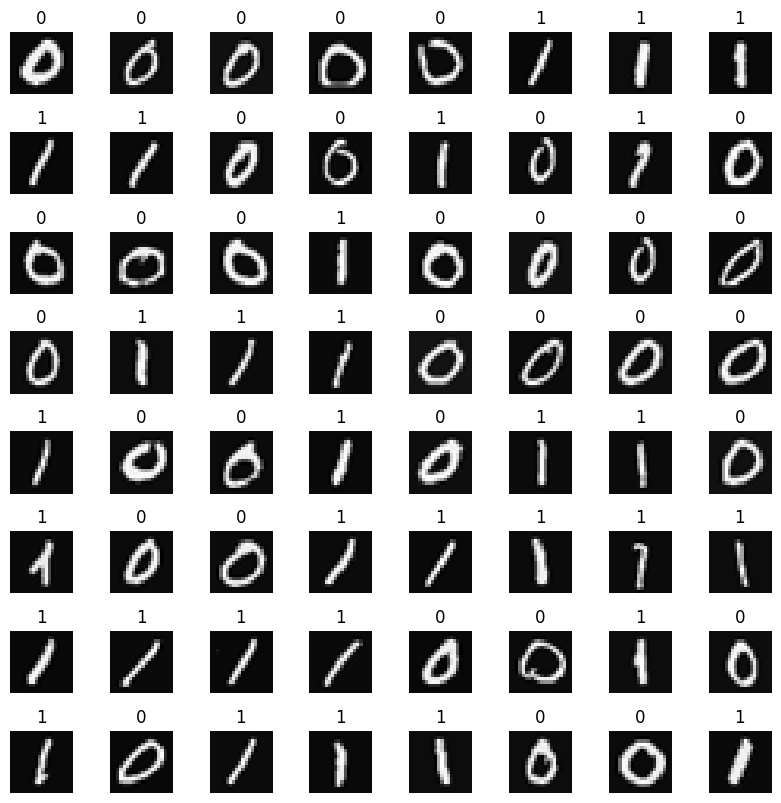

In [10]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

m, n = X.shape
for i, ax in enumerate(axes.flat):
  rand_index = np.random.randint(m)

  rand_example = X[rand_index].reshape(20, 20).T
  ax.imshow(rand_example, cmap='gray')
  ax.set_title(f"{y[rand_index, 0]}")
  ax.set_axis_off()

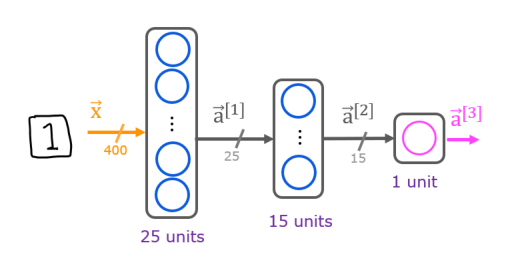

In [13]:
import matplotlib.image as mpimg

img = mpimg.imread('./images/C2_W1_Assign1.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='digit_recognition_model')

In [15]:
model.summary()

Model: "digit_recognition_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
layer1 = model.get_layer('dense')
layer2 = model.get_layer('dense_1')
layer3 = model.get_layer('dense_2')
print(f"{layer1}")

In [ ]:
print(f"--------------- layer1 -------------------")
W1 = layer1.get_weights()
print(f"W1 is {W1}")

print(f"--------------- layer2 -------------------")
W2 = layer2.get_weights()
print(f"W2 is {W2}")

print(f"--------------- layer3 -------------------")
W3 = layer3.get_weights()
print(f"W3 is {W3}")


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

In [ ]:
prediction1 = model.predict(X[0].reshape(1, 400))
print(f"prediction zero: {prediction1}")

prediction2 = model.predict(X[-1].reshape(1, 400))
print(f"prediction one: {prediction2}")

1/1 [==============================] - 0s 29ms/step


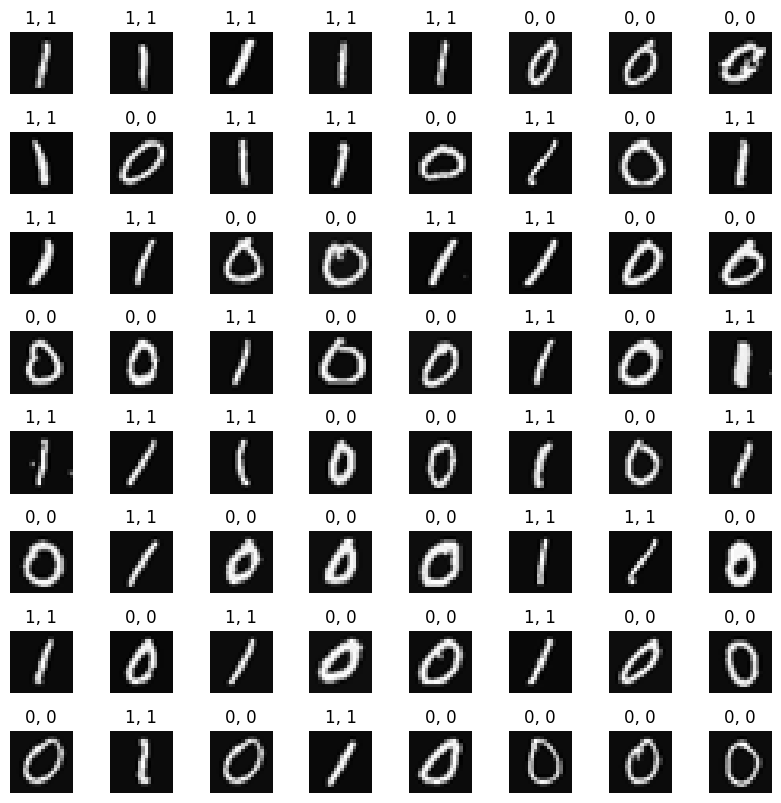

In [20]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

m, n = X.shape
for i, ax in enumerate(axes.flat):
  rand_index = np.random.randint(m)

  rand_example = X[rand_index]
  res_transposed_example = rand_example.reshape((20, 20)).T
  ax.imshow(res_transposed_example, cmap='gray')

  prediction = model.predict(rand_example.reshape(1, 400))
  ax.set_title(f"{y[rand_index, 0]}, {int(prediction >= 0.5)}")
  ax.set_axis_off()